In [1]:
import sympy as sp
import numpy as np
from sympy import symbols
sf = sp.SingularityFunction
import matplotlib.pyplot as plt

In [2]:
EI = symbols('EI')
x = symbols('x')

In [3]:
## het oplossen van differentiaal vergelijking
## in x-richting
# Define the symbols
cv, cn, qx, qz, theta = sp.symbols('cv, cn, qx, qz, theta')  ## cv = dv/dx, cn = dn/dx

# Define the equations
eq1 = (qx* sp.tan(theta)) + (sp.sin(theta) * cv) + (sp.cos(theta) * cn)
eq2 = (qz) + (sp.cos(theta) * cv) - (sp.sin(theta) * cn)

# Solve the system of equations
solution = sp.solve((eq1, eq2), (cv, cn))

# Display the solution
print("Solution in the x-direction:")
display("dV/dx =", solution[cv])
display("dN/dx =", solution[cn])

Solution in the x-direction:


'dV/dx ='

-qx*sin(theta)*tan(theta) - qz*cos(theta)

'dN/dx ='

(-qx + qz)*sin(theta)

In [4]:
## het oplossen van differentiaal vergelijking

## in x-richting

# Define the symbols
cv, cn, qx, qz, theta = sp.symbols('cv, cn, qx, qz, theta')  ## cv = dv/dx, cn = dn/dx

# Define the equations
eq1 = (qx) + (sp.sin(theta) * cv) + (sp.cos(theta) * cn)
eq2 = (qz) + (sp.cos(theta) * cv) - (sp.sin(theta) * cn)

# Solve the system of equations
solution = sp.solve((eq1, eq2), (cv, cn))

# Display the solution
print("Solution in the x-direction:")
display("dV/dx =", solution[cv])
display("dN/dx =", solution[cn])

Solution in the x-direction:


'dV/dx ='

-qx*sin(theta) - qz*cos(theta)

'dN/dx ='

-qx*cos(theta) + qz*sin(theta)

# Voorbeeld 1

In [5]:
Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, Cu = sp.symbols('Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, Cu')

# F, l en theta definiëren 
F = 10  ## KN
l = 4   ## m
theta = sp.atan(1/2) 

# qz en qx definiëren
qz = -Av * sf(x, 0, -1) + F * sf(x, l/2, -1) - Bv * sf(x, l, -1)
qx = Ah * sf(x, 0, -1)

In [6]:
# V definiëren als een functie van x
V = sp.integrate(-qx * sp.sin(theta), x) + sp.integrate(-qz * sp.cos(theta), x) + Cv
# N definiëren als een functie van x
N = sp.integrate(-qx * sp.cos(theta), x) + sp.integrate(qz * sp.sin(theta), x) + Cn

In [7]:
# N definiëren als een functie van x
M = sp.integrate(V/sp.cos(theta), x) + Cm

# phi definiëren als een functie van x
phi = sp.integrate(M, x) + Cphi

# W definiëren als een functie van x
W = sp.integrate(-phi, x) + Cw

In [8]:
# u definiëren als een functie van x
u = sp.integrate(N, x) + Cu

In [9]:
display("V:", V)
display("M:", M)
display("phi:", phi)
display("W:", W)
display("N:", N)
display("u:", u)

'V:'

-0.447213595499958*Ah*SingularityFunction(x, 0, 0) + 0.894427190999916*Av*SingularityFunction(x, 0, 0) + 0.894427190999916*Bv*SingularityFunction(x, 4, 0) + Cv - 8.94427190999916*SingularityFunction(x, 2.0, 0)

'M:'

-0.5*Ah*SingularityFunction(x, 0, 1) + 1.0*Av*SingularityFunction(x, 0, 1) + 1.0*Bv*SingularityFunction(x, 4, 1) + Cm + 1.11803398874989*Cv*x - 10.0*SingularityFunction(x, 2.0, 1)

'phi:'

-0.25*Ah*SingularityFunction(x, 0, 2) + 0.5*Av*SingularityFunction(x, 0, 2) + 0.5*Bv*SingularityFunction(x, 4, 2) + Cm*x + Cphi + 0.559016994374947*Cv*x**2 - 5.0*SingularityFunction(x, 2.0, 2)

'W:'

0.0833333333333333*Ah*SingularityFunction(x, 0, 3) - 0.166666666666667*Av*SingularityFunction(x, 0, 3) - 0.166666666666667*Bv*SingularityFunction(x, 4, 3) - Cm*x**2/2 - Cphi*x - 0.186338998124982*Cv*x**3 + Cw + 1.66666666666667*SingularityFunction(x, 2.0, 3)

'N:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 0) - 0.447213595499958*Av*SingularityFunction(x, 0, 0) - 0.447213595499958*Bv*SingularityFunction(x, 4, 0) + Cn + 4.47213595499958*SingularityFunction(x, 2.0, 0)

'u:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 1) - 0.447213595499958*Av*SingularityFunction(x, 0, 1) - 0.447213595499958*Bv*SingularityFunction(x, 4, 1) + Cn*x + Cu + 4.47213595499958*SingularityFunction(x, 2.0, 1)

In [10]:
## Voorwarden

eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+1) 

eq3 = M.subs(x, 0)
eq4 = M.subs(x, l)

eq5 = W.subs(x, l)
eq6 = W.subs(x, 0)

eq7 = N.subs(x, -1)
eq8 = N.subs(x, l+1)

eq9 = u.subs(x, 0)

equations = [eq1 -0, eq2-0,eq3-0,eq4-0,eq5-0,eq6-0, eq7-0, eq8 -0, eq9 - 0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, Cu))

In [11]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: -10.0000000000000, Cw: 0.0, Av: 5.00000000000000, Bv: 5.00000000000000, Ah: 0.0, Cn: 0.0, Cu: 0.0}


In [12]:
l/sp.cos(theta)

4.47213595499958

In [13]:
x_val = np.linspace(0, 4.47213595499958, 901)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
V_list = V_numpy(x_val)

#print(V_list)

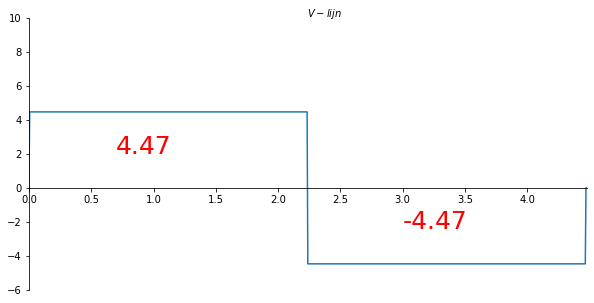

In [14]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-6, 10)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(V_list) , label='V-lijn')
plt.text(0.7, 2, f'{V_list[100]:.2f}', fontsize=25, color='red')
plt.text(3, -2.4, f'{V_list[500]:.2f}', fontsize=25, color='red')
plt.savefig('V_lijnvoorbeeld1', dpi=450);

In [15]:
x_val = np.linspace(0, l, 901)
M_numpy = sp.lambdify(x,M.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
M_list = M_numpy(x_val)
#print(M_list)

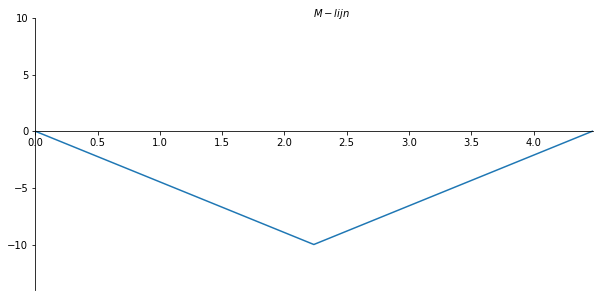

In [16]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-14, 10)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(M_list) , label='M-lijn');
plt.savefig('M_lijnvoorbeeld1', dpi=450);

In [17]:
x_val = np.linspace(0, l, 901)
phi_numpy = sp.lambdify(x,phi.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
phi_list = phi_numpy(x_val)

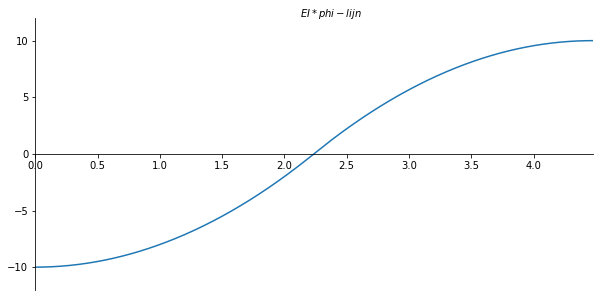

In [18]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-12, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EI*phi-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(phi_list) , label='phi-lijn')
plt.savefig('phi_lijnvoorbeeld1', dpi=450);

In [19]:
x_val = np.linspace(0, l, 901)
W_numpy = sp.lambdify(x,W.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
W_list = W_numpy(x_val)

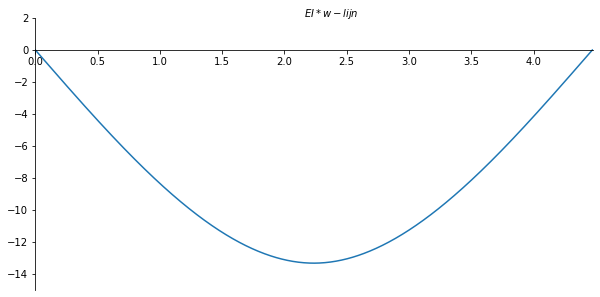

In [20]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-15, 2)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EI*w-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(W_list) , label='w-lijn')
plt.savefig('w_lijnvoorbeeld1', dpi=450);

In [21]:
x_val = np.linspace(0,  4.47213595499958, 901)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
N_list = N_numpy(x_val)

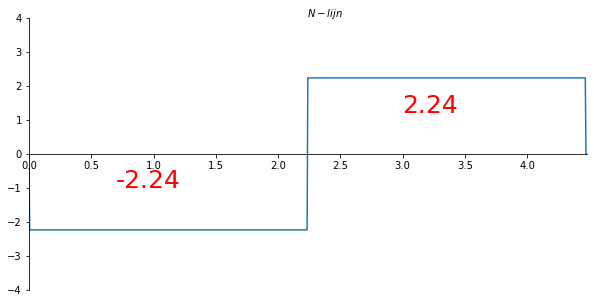

In [22]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-4, 4)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$N-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.text(0.7, -1, f'{N_list[100]:.2f}', fontsize=25, color='red')
plt.text(3, 1.2, f'{N_list[500]:.2f}', fontsize=25, color='red')
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(N_list) , label='N-lijn')
plt.savefig('N_lijnvoorbeeld1', dpi=450);

In [23]:
x_val = np.linspace(0, l, 301)
u_numpy = sp.lambdify(x,u.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
u_list = u_numpy(x_val)

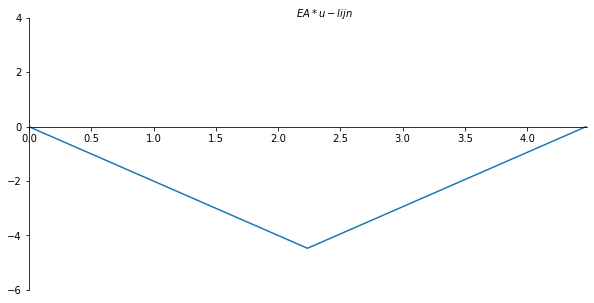

In [24]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-6, 4)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EA*u-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(u_list) , label='u-lijn')
plt.savefig('u_lijnvoorbeeld1', dpi=450);

# Voorbeeld 2

In [25]:
Cv, Cm, Cphi, Cw, Av, MA, Ah, Cn, Cu = sp.symbols('Cv, Cm, Cphi, Cw, Av, MA, Ah, Cn, Cu')

# F, l en theta definiëren 
F = 10  ## KN
l = 4   ## m
theta = sp.atan(1/2) 

# qz en qx definiëren
qz = -Av * sf(x, 0, -1) + MA * sf(x, 0, -2) + F * sf(x, l, -1)
qx = Ah * sf(x, 0, -1) - F * sf(x, l, -1)

In [26]:
# V definiëren als een functie van x
V = sp.integrate(-qx * sp.sin(theta), x) + sp.integrate(-qz * sp.cos(theta), x) + Cv
# N definiëren als een functie van x
N = sp.integrate(-qx * sp.cos(theta), x) + sp.integrate(qz * sp.sin(theta), x) + Cn

In [27]:
# N definiëren als een functie van x
M = sp.integrate(V/sp.cos(theta), x) + Cm

# phi definiëren als een functie van x
phi = sp.integrate(M, x) + Cphi

# W definiëren als een functie van x
W = sp.integrate(-phi, x) + Cw

In [28]:
# u definiëren als een functie van x
u = sp.integrate(N, x) + Cu

In [29]:
display("V:", V)
display("M:", M)
display("phi:", phi)
display("W:", W)
display("N:", N)
display("u:", u)

'V:'

-0.447213595499958*Ah*SingularityFunction(x, 0, 0) + 0.894427190999916*Av*SingularityFunction(x, 0, 0) + Cv - 0.894427190999916*MA*SingularityFunction(x, 0, -1) - 4.47213595499958*SingularityFunction(x, 4, 0)

'M:'

-0.5*Ah*SingularityFunction(x, 0, 1) + 1.0*Av*SingularityFunction(x, 0, 1) + Cm + 1.11803398874989*Cv*x - 1.0*MA*SingularityFunction(x, 0, 0) - 5.0*SingularityFunction(x, 4, 1)

'phi:'

-0.25*Ah*SingularityFunction(x, 0, 2) + 0.5*Av*SingularityFunction(x, 0, 2) + Cm*x + Cphi + 0.559016994374947*Cv*x**2 - 1.0*MA*SingularityFunction(x, 0, 1) - 2.5*SingularityFunction(x, 4, 2)

'W:'

0.0833333333333333*Ah*SingularityFunction(x, 0, 3) - 0.166666666666667*Av*SingularityFunction(x, 0, 3) - Cm*x**2/2 - Cphi*x - 0.186338998124982*Cv*x**3 + Cw + 0.5*MA*SingularityFunction(x, 0, 2) + 0.833333333333333*SingularityFunction(x, 4, 3)

'N:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 0) - 0.447213595499958*Av*SingularityFunction(x, 0, 0) + Cn + 0.447213595499958*MA*SingularityFunction(x, 0, -1) + 13.4164078649987*SingularityFunction(x, 4, 0)

'u:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 1) - 0.447213595499958*Av*SingularityFunction(x, 0, 1) + Cn*x + Cu + 0.447213595499958*MA*SingularityFunction(x, 0, 0) + 13.4164078649987*SingularityFunction(x, 4, 1)

In [30]:
## Voorwarden

eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+0.1) 

eq3 = M.subs(x, -1)
eq4 = M.subs(x, l)

eq5 = phi.subs(x, 0)
eq6 = W.subs(x, 0)

eq7 = N.subs(x, -1)
eq8 = N.subs(x, l+0.1)
eq9 = u.subs(x, 0)
equations = [eq1 -0, eq2-0,eq3-0,eq4-0,eq5-0,eq6-0, eq7-0, eq8 -0, eq9 -0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, MA, Ah, Cn, Cu))

In [31]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: 0.0, Cw: 0.0, Av: 9.99999999999998, MA: 20.0000000000000, Ah: 9.99999999999996, Cn: 0.0, Cu: -8.94427190999916}


V-lijn

In [32]:
x_val = np.linspace(0, 4.47213595499958, 901)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
V_list = V_numpy(x_val)
#print(V_list)

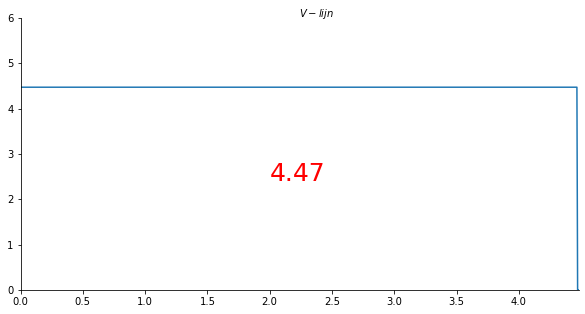

In [33]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(0, 6)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.text(2, 2.4, f'{V_list[100]:.2f}', fontsize=25, color='red')
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(V_list) , label='V-lijn')
plt.savefig('V_lijnvoorbeeld2', dpi=450);

In [34]:
x_val = np.linspace(0, l, 901)
M_numpy = sp.lambdify(x,M.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
M_list = M_numpy(x_val)

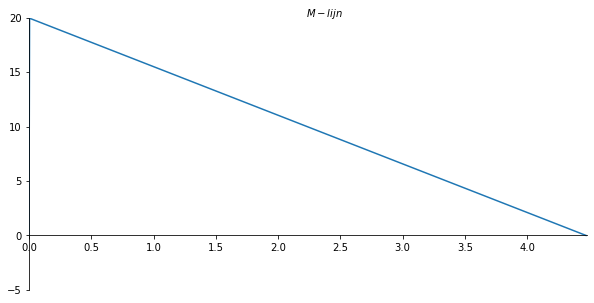

In [35]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-5, 20)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(M_list) , label='M-lijn');
plt.savefig('M_lijnvoorbeeld2', dpi=450);

In [36]:
x_val = np.linspace(0, l, 901)
phi_numpy = sp.lambdify(x,phi.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
phi_list = phi_numpy(x_val)

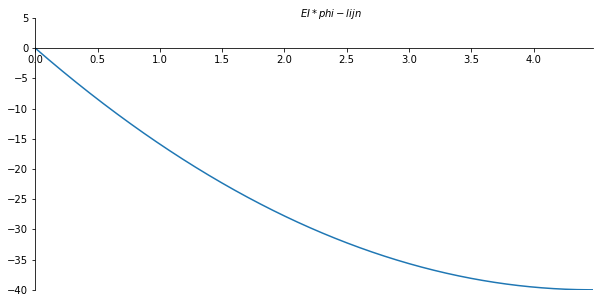

In [37]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-40, 5)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EI*phi-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(phi_list) , label='phi-lijn')
plt.savefig('phi_lijnvoorbeeld2', dpi=450);

w-lijn

In [38]:
x_val = np.linspace(0, l, 901)
W_numpy = sp.lambdify(x,W.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
W_list = W_numpy(x_val)

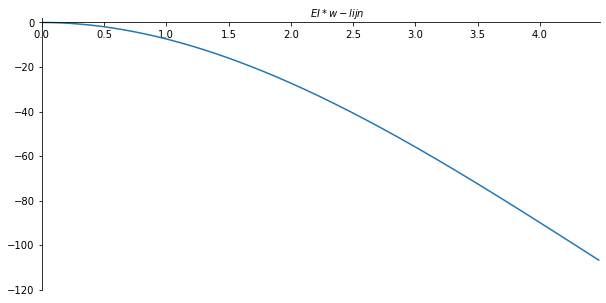

In [39]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-120, 2)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EI*w-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(W_list) , label='w-lijn')
plt.savefig('w_lijnvoorbeeld2', dpi=450);

N-lijn

In [40]:
x_val = np.linspace(0, 4.47213595499958, 901)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
N_list = N_numpy(x_val)

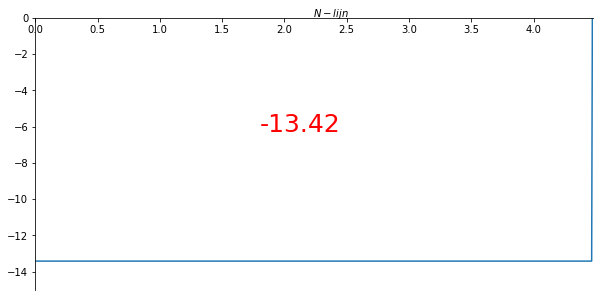

In [41]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-15, 0)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.set_xlabel("$N-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.text(1.8, -6.3, f'{N_list[100]:.2f}', fontsize=25, color='red')
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(N_list) , label='N-lijn')
plt.savefig('N_lijnvoorbeeld2', dpi=450);

In [42]:
x_val = np.linspace(0, l, 901)
u_numpy = sp.lambdify(x,u.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
u_list = u_numpy(x_val)

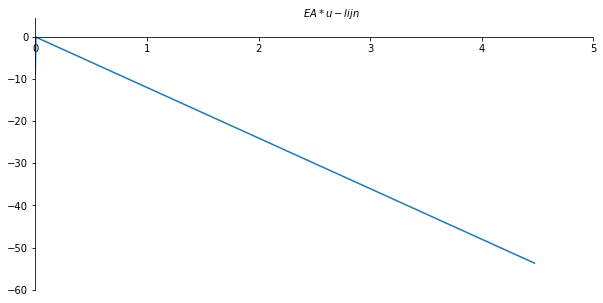

In [43]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-60, 4.48)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EA*u-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(u_list) , label='u-lijn')
plt.savefig('u_lijnvoorbeeld2', dpi=450);

# Voorbeeld 3

In [44]:
Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, MA = sp.symbols('Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, MA')

# F, l en theta definiëren 
F = 10  ## KN
l = 4   ## m
T = 10
theta = sp.atan(1/2) 

# qz en qx definiëren
qz = -Av * sf(x, 0, -1) + MA*sf(x, 0, -2) - Bv * sf(x, l, -1) + T *sf(x, l/4, -2)
qx = Ah * sf(x, 0, -1) -F*sf(x, l/2, -1) 

In [45]:
# V definiëren als een functie van x
V = sp.integrate(-qx * sp.sin(theta), x) + sp.integrate(-qz * sp.cos(theta), x) + Cv
# N definiëren als een functie van x
N = sp.integrate(-qx * sp.cos(theta), x) + sp.integrate(qz * sp.sin(theta), x) + Cn

In [46]:
# N definiëren als een functie van x
M = sp.integrate(V/sp.cos(theta), x) + Cm

# phi definiëren als een functie van x
phi = sp.integrate(M, x) + Cphi

# W definiëren als een functie van x
W = sp.integrate(-phi, x) + Cw

In [47]:
# u definiëren als een functie van x
u = sp.integrate(N, x) + Cu

In [48]:
display("V:", V)
display("M:", M)
display("phi:", phi)
display("W:", W)
display("N:", N)
display("u:", u)

'V:'

-0.447213595499958*Ah*SingularityFunction(x, 0, 0) + 0.894427190999916*Av*SingularityFunction(x, 0, 0) + 0.894427190999916*Bv*SingularityFunction(x, 4, 0) + Cv - 0.894427190999916*MA*SingularityFunction(x, 0, -1) - 8.94427190999916*SingularityFunction(x, 1.0, -1) + 4.47213595499958*SingularityFunction(x, 2.0, 0)

'M:'

-0.5*Ah*SingularityFunction(x, 0, 1) + 1.0*Av*SingularityFunction(x, 0, 1) + 1.0*Bv*SingularityFunction(x, 4, 1) + Cm + 1.11803398874989*Cv*x - 1.0*MA*SingularityFunction(x, 0, 0) - 10.0*SingularityFunction(x, 1.0, 0) + 5.0*SingularityFunction(x, 2.0, 1)

'phi:'

-0.25*Ah*SingularityFunction(x, 0, 2) + 0.5*Av*SingularityFunction(x, 0, 2) + 0.5*Bv*SingularityFunction(x, 4, 2) + Cm*x + Cphi + 0.559016994374947*Cv*x**2 - 1.0*MA*SingularityFunction(x, 0, 1) - 10.0*SingularityFunction(x, 1.0, 1) + 2.5*SingularityFunction(x, 2.0, 2)

'W:'

0.0833333333333333*Ah*SingularityFunction(x, 0, 3) - 0.166666666666667*Av*SingularityFunction(x, 0, 3) - 0.166666666666667*Bv*SingularityFunction(x, 4, 3) - Cm*x**2/2 - Cphi*x - 0.186338998124982*Cv*x**3 + Cw + 0.5*MA*SingularityFunction(x, 0, 2) + 5.0*SingularityFunction(x, 1.0, 2) - 0.833333333333333*SingularityFunction(x, 2.0, 3)

'N:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 0) - 0.447213595499958*Av*SingularityFunction(x, 0, 0) - 0.447213595499958*Bv*SingularityFunction(x, 4, 0) + Cn + 0.447213595499958*MA*SingularityFunction(x, 0, -1) + 4.47213595499958*SingularityFunction(x, 1.0, -1) + 8.94427190999916*SingularityFunction(x, 2.0, 0)

'u:'

-0.894427190999916*Ah*SingularityFunction(x, 0, 1) - 0.447213595499958*Av*SingularityFunction(x, 0, 1) - 0.447213595499958*Bv*SingularityFunction(x, 4, 1) + Cn*x + Cu + 0.447213595499958*MA*SingularityFunction(x, 0, 0) + 4.47213595499958*SingularityFunction(x, 1.0, 0) + 8.94427190999916*SingularityFunction(x, 2.0, 1)

In [49]:
eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+1) 

eq3 = M.subs(x, -1)
eq4 = M.subs(x, l)

eq5 = W.subs(x, 0)
eq6 = phi.subs(x, 0)

eq7 = N.subs(x, -1)
eq8 = W.subs(x, l)
eq9 = N.subs(x, l+1)

eq10 = u.subs(x, 0)
equations = [eq1 - 0, eq2 - 0 , eq3 - 0, eq4 - 0, eq5 - 0, eq6 - 0, eq7 - 0, eq8 -0, eq9 - 0, eq10]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, MA, Cn, Ah, Bv, Cu))

In [50]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: 0.0, Cw: 0.0, Av: 3.20312500000000, MA: -7.18750000000000, Cn: 0.0, Ah: 10.0000000000000, Bv: -3.20312500000000, Cu: 3.21434771765595}


In [51]:
x_val = np.linspace(0, 4.4721359549995, 901)
V_numpy = sp.lambdify(x,V.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
V_list = V_numpy(x_val)


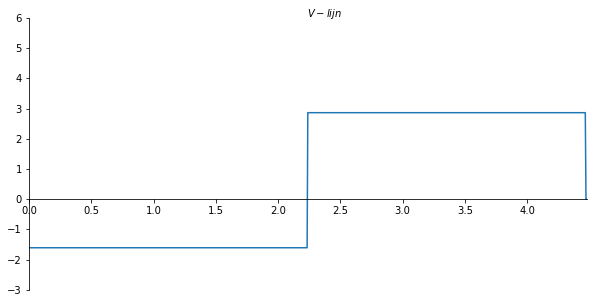

In [52]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-3, 6)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(V_list) , label='V-lijn')
plt.savefig('V_lijnvoorbeeld3', dpi=450);

In [53]:
x_val = np.linspace(0, l, 901)
M_numpy = sp.lambdify(x,M.subs(solutions).rewrite(sp.Piecewise).simplify()) 
M_list = M_numpy(x_val)

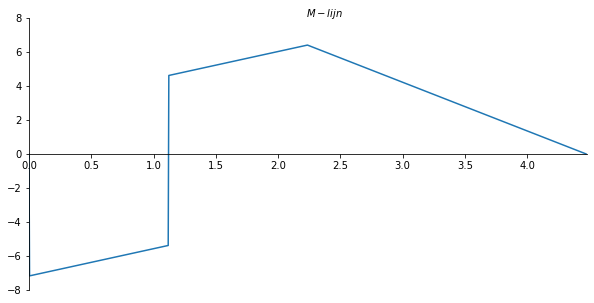

In [54]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-8, 8)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  -np.array(M_list) , label='M-lijn');
plt.savefig('M_lijnvoorbeeld3', dpi=450);

In [55]:
x_val = np.linspace(0, l, 901)
phi_numpy = sp.lambdify(x,phi.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
phi_list = phi_numpy(x_val)

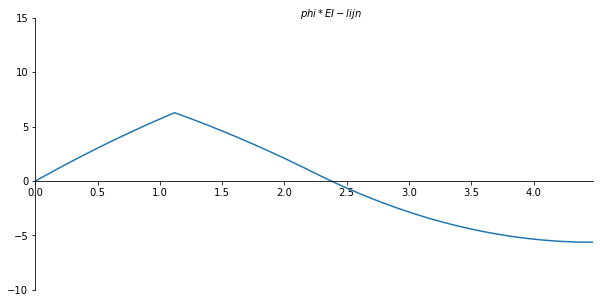

In [56]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-10, 15)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$phi*EI-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(phi_list) , label='phi-lijn')
plt.savefig('phi_lijnvoorbeeld3', dpi=450);

In [57]:
x_val = np.linspace(0, l, 901)
W_numpy = sp.lambdify(x,W.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
W_list = W_numpy(x_val)

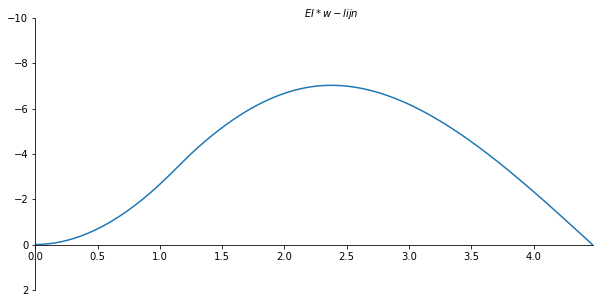

In [58]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(2, -10)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$EI * w-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(W_list) , label='w-lijn')
plt.savefig('w_lijnvoorbeeld3', dpi=450);

In [59]:
x_val = np.linspace(0, 4.47213595499958, 901)
N_numpy = sp.lambdify(x,N.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
N_list = N_numpy(x_val)

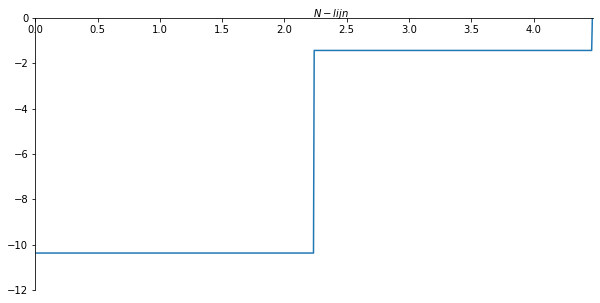

In [60]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(-12, 0)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.set_xlabel("$N-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(N_list) , label='N-lijn')
plt.savefig('N_lijnvoorbeeld3', dpi=450);

In [61]:
x_val = np.linspace(0, l, 301)
u_numpy = sp.lambdify(x,u.subs(solutions).rewrite(sp.Piecewise).simplify()) #substitute full solution, make python function of formula
u_list = u_numpy(x_val)

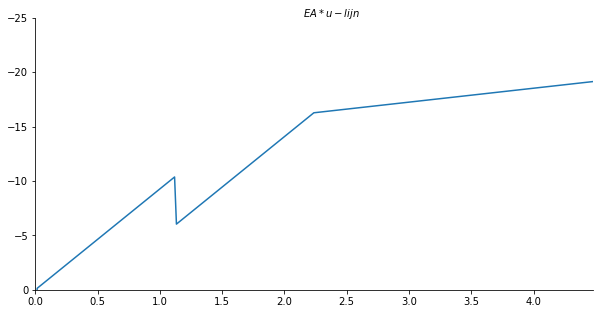

In [62]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.48)
ax.set_ylim(0, -25)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)

ax.set_xlabel("$EA*u-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta),  np.array(u_list) , label='N-lijn')
plt.savefig('u_lijnvoorbeeld3', dpi=450);